In [29]:
import numpy as np
import pandas as pd

In [30]:
train_file=r'C:/Users/sr/Downloads/counterfeit_train.csv'
test_file=r'C:/Users/sr/Downloads/counterfeit_test.csv'

In [31]:
cf_train=pd.read_csv(train_file)
cf_test=pd.read_csv(test_file)

In [32]:
cf_train.head()
#cf_test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [40]:
for col in ['Medicine_ID']:
    cf_train.drop(col,1,inplace=True)
    cf_test.drop(col,1,inplace=True)

In [41]:
cf_train['Counterfeit_Weight'].fillna(cf_train['Counterfeit_Weight'].mean(),inplace=True)
cf_test['Counterfeit_Weight'].fillna(cf_test['Counterfeit_Weight'].mean(),inplace=True)

In [42]:
#cf_test['Counterfeit_Weight'].isnull().sum()
cf_test.dtypes

Counterfeit_Weight     float64
DistArea_ID             object
Active_Since             int64
Medicine_MRP           float64
Medicine_Type           object
SidEffect_Level          int32
Availability_rating    float64
Area_Type               object
Area_City_Type          object
Area_dist_level         object
dtype: object

In [43]:
print(cf_train['DistArea_ID'].unique())#dummies
print(cf_train['Active_Since'].unique())
print(cf_train['Medicine_Type'].unique())
print(cf_train['SidEffect_Level'].unique())
print(cf_train['Area_Type'].unique())
print(cf_train['Active_Since'].unique())

['Area046' 'Area027' 'Area019' 'Area045' 'Area018' 'Area013' 'Area017'
 'Area010' 'Area035' 'Area049']
[1995 1983 2000 2007 1985 2005 1996 2002 1997]
['Antimalarial' 'Mstablizers' 'Cardiac' 'OralContraceptives'
 'Hreplacements' 'Antiseptics' 'Statins' 'Analgesics' 'MuscleRelaxants'
 'Antibiotics' 'Antifungal' 'Antiviral' 'Tranquilizers' 'Antacids'
 'Antipyretics' 'Stimulants']
[1 0]
['DownTown' 'CityLimits' 'MidTownResidential' 'Industrial']
[1995 1983 2000 2007 1985 2005 1996 2002 1997]


In [44]:
cf_train['SidEffect_Level']=np.where(cf_train['SidEffect_Level']=='critical',1,0).astype(int)
cf_test['SidEffect_Level']=np.where(cf_test['SidEffect_Level']=='critical',1,0).astype(int)

E:\nani ana\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [45]:
for col in ['Medicine_Type','Area_Type','Area_City_Type','Area_dist_level',"DistArea_ID"]:  
    temp=pd.get_dummies(cf_train[col],prefix=col,drop_first=True)
    cf_train=pd.concat([temp,cf_train],1)
    cf_train.drop([col],1,inplace=True)
       
    temp=pd.get_dummies(cf_test[col],prefix=col,drop_first=True)
    cf_test=pd.concat([temp,cf_test],1)
    cf_test.drop([col],1,inplace=True)

In [46]:


cf_train.head()

,DistArea_ID_Area013,DistArea_ID_Area017,DistArea_ID_Area018,DistArea_ID_Area019,DistArea_ID_Area027,DistArea_ID_Area035,DistArea_ID_Area045,DistArea_ID_Area046,DistArea_ID_Area049,Area_dist_level_Medium,...,Medicine_Type_OralContraceptives,Medicine_Type_Statins,Medicine_Type_Stimulants,Medicine_Type_Tranquilizers,Counterfeit_Weight,Active_Since,Medicine_MRP,SidEffect_Level,Availability_rating,Counterfeit_Sales
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,13.100000,1995,160.2366,0,0.070422,1775.5026
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,14.115057,1983,110.4384,0,0.013000,3069.1520
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,9.025000,1995,259.4092,0,0.060783,2603.0920
3,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,11.800000,1995,99.9830,0,0.065555,1101.7130
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,14.115057,1983,56.4402,0,0.248859,158.9402


In [47]:
for col in['Counterfeit_Weight','Medicine_MRP','Availability_rating']:
    cf_train[col]=(cf_train[col]).astype(int)
    cf_test[col]=(cf_test[col]).astype(int)

In [48]:
cf_train.dtypes

DistArea_ID_Area013                   uint8
DistArea_ID_Area017                   uint8
DistArea_ID_Area018                   uint8
DistArea_ID_Area019                   uint8
DistArea_ID_Area027                   uint8
DistArea_ID_Area035                   uint8
DistArea_ID_Area045                   uint8
DistArea_ID_Area046                   uint8
DistArea_ID_Area049                   uint8
Area_dist_level_Medium                uint8
Area_dist_level_Small                 uint8
Area_dist_level_Unknown               uint8
Area_City_Type_Tier 2                 uint8
Area_City_Type_Tier 3                 uint8
Area_Type_DownTown                    uint8
Area_Type_Industrial                  uint8
Area_Type_MidTownResidential          uint8
Medicine_Type_Antacids                uint8
Medicine_Type_Antibiotics             uint8
Medicine_Type_Antifungal              uint8
Medicine_Type_Antimalarial            uint8
Medicine_Type_Antipyretics            uint8
Medicine_Type_Antiseptics       

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scalr=StandardScaler()

In [77]:
scalr.fit(cf_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
from sklearn.model_selection import train_test_split
cf_train1,cf_train2=train_test_split(cf_train,test_size=0.2,random_state=2)

In [53]:
x_train1=cf_train1.drop('Counterfeit_Sales',axis=1)
y_train1=cf_train1['Counterfeit_Sales']

In [54]:
x_train1.shape,y_train1.shape

((5454, 37), (5454,))

# Linear Regression

In [55]:
#beacause its a continuoes numeric o/p

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lm=LinearRegression()

In [58]:
lm.fit(x_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
lm.intercept_

-5023331253115754.0

In [60]:
list(zip(x_train1.columns,lm.coef_))

[('DistArea_ID_Area013', 32326456215.25033),
 ('DistArea_ID_Area017', -12189791324571.938),
 ('DistArea_ID_Area018', -70066601716325.65),
 ('DistArea_ID_Area019', 32165361922337.81),
 ('DistArea_ID_Area027', 27294371071885.258),
 ('DistArea_ID_Area035', -7828638501989.547),
 ('DistArea_ID_Area045', 488786878753.0389),
 ('DistArea_ID_Area046', 190878897451.69705),
 ('DistArea_ID_Area049', 6785077615932.209),
 ('Area_dist_level_Medium', -34734286155222.746),
 ('Area_dist_level_Small', -23068656155417.863),
 ('Area_dist_level_Unknown', -26314650254981.41),
 ('Area_City_Type_Tier 2', -9730492085326.25),
 ('Area_City_Type_Tier 3', 2447052692815.135),
 ('Area_Type_DownTown', -12543672822387.96),
 ('Area_Type_Industrial', 36503797409671.05),
 ('Area_Type_MidTownResidential', -14089568160793.875),
 ('Medicine_Type_Antacids', 5.483007431030273),
 ('Medicine_Type_Antibiotics', 74.70945930480957),
 ('Medicine_Type_Antifungal', -1.3186635971069336),
 ('Medicine_Type_Antimalarial', 13.9561595916748

In [62]:
x_train2=cf_train2.drop('Counterfeit_Sales',axis=1)

In [63]:
predicted_sales=lm.predict(x_train2)

In [65]:
print(predicted_sales[:10])

[1035.  854. 3882. 3670. 1261. 2751. 1958. 4310. 2460. 3529.]


In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
mean_absolute_error(cf_train2['Counterfeit_Sales'],predicted_sales)

829.5865626099705

In [68]:
#We know the tentative performance now, lets build the model on entire training to make prediction on
#test/production

In [70]:
x_train=cf_train.drop('Counterfeit_Sales',axis=1) 
y_train=cf_train['Counterfeit_Sales'] 

In [71]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
test_pred=lm.predict(cf_test)

In [73]:
test_pred

array([2817.20608792, 3947.83123692, 1448.166232  , ..., 2928.57498948,
       3860.80777296, 3734.28368662])

In [74]:
import seaborn as sns

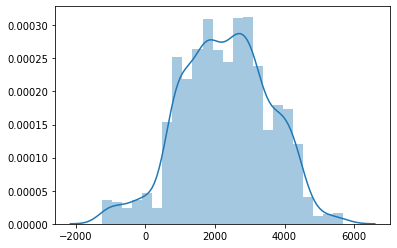

In [75]:
sns.distplot(test_pred)

# Lasso

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [79]:
params={'alpha':np.linspace(0.1,100,50)}

In [80]:
model=Lasso(fit_intercept=True)

In [81]:
grid_search=GridSearchCV(model,cv=10,param_grid=params,n_jobs=-1,verbose=10,
                         scoring='neg_mean_absolute_error')

In [82]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1953s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1630s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 115 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 167 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 287 tasks      | elapsed:   12.6s
[Parallel(n_jo

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([  0.1       ,   2.13877551,   4.17755102,   6.21632653,
         8.25510204,  10.29387755,  12.332...
        57.18571429,  59.2244898 ,  61.26326531,  63.30204082,
        65.34081633,  67.37959184,  69.41836735,  71.45714286,
        73.49591837,  75.53469388,  77.57346939,  79.6122449 ,
        81.65102041,  83.68979592,  85.72857143,  87.76734694,
        89.80612245,  91.84489796,  93.88367347,  95.92244898,
        97.96122449, 100.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_err

In [83]:
logr=grid_search.best_estimator_

In [84]:
logr.fit(x_train,y_train)

Lasso(alpha=8.255102040816327, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
logr.predict(x_train)

array([2532.50166254, 3076.09308251, 4084.02450222, ..., 3054.0468423 ,
       2569.42100009, 2593.41471989])

In [61]:
mean_absolute_error(y_train,logr.predict(x_train))

823.8166717506169

In [86]:
final_test_pred=grid_search.predict(cf_test)

In [87]:
final_test_pred

array([2686.89726611, 4040.63454741, 1580.81026511, ..., 2882.80068308,
       3945.45275451, 3757.72998532])

# Decision Tree

In [88]:
params={'max_depth':[None,5,10,15,20,30,50,70],
            'min_samples_leaf':[1,2,5,10,15,20], 
            'min_samples_split':[2,5,10,15,20]
       }

In [89]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [90]:
reg=DecisionTreeRegressor()

In [91]:
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=params,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [92]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_dis

In [93]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [94]:
#The above function shows the top best_estimators

In [95]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -753.65947 (std: 25.28816)
Parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_depth': 5}

Model with rank: 2
Mean validation score: -753.66584 (std: 25.22026)
Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 5}

Model with rank: 2
Mean validation score: -753.66584 (std: 25.22026)
Parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5}



In [96]:
best_estimator=random_search.best_estimator_

In [97]:
best_estimator.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [98]:
final_pred=best_estimator.predict(cf_test)

In [99]:
final_pred

array([1979.07095   , 4055.50681309, 1590.76447225, ..., 3113.08473391,
       3476.12993231, 4055.50681309])

# Random_forest

In [100]:
param_dist = {"n_estimators":[50,100,200],
              "max_features": [2,4,5,6,8],
              "bootstrap": [True, False],
                'max_depth':[None,5,10,15,20,30,50,70],
                'min_samples_leaf':[1,2,5,10,15,20], 
                'min_samples_split':[2,5,10,15,20]
                  }

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
reg=RandomForestRegressor()

In [103]:
n_iter_search = 10
random_search=RandomizedSearchCV(reg,
                                 cv=10,
                                 param_distributions=param_dist,
                                 scoring='neg_mean_absolute_error',
                                 n_iter=10,n_jobs=-1,verbose=20
                                    )

In [104]:
random_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_st...


In [105]:
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: -766.42724 (std: 24.04379)
Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 15, 'bootstrap': False}

Model with rank: 2
Mean validation score: -767.57688 (std: 24.90492)
Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 8, 'max_depth': 70, 'bootstrap': False}

Model with rank: 3
Mean validation score: -771.79662 (std: 23.98173)
Parameters: {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 15, 'max_features': 8, 'max_depth': None, 'bootstrap': False}



In [106]:
best_estimator=random_search.best_estimator_

In [107]:
best_estimator.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=15,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [108]:
final_rf_predictors=best_estimator.predict(cf_test)

In [110]:
final_rf_predictors

array([2393.3540138 , 4039.92164673, 1507.50987399, ..., 2973.81206899,
       3285.24383487, 4286.41256062])

# Gradient BOOSTing

In [111]:
!pip install xgboost

In [118]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

In [141]:
gbm_params={'n_estimators':[50,100,200,500,700],
           'learning_rate':[0.01,.05,0.1,0.4,0.8,1],
           'max_depth':[1,2,3,4,5],
           'subsample':[0.5,0.8],
           'max_features':[5,7,10,20,25,30,35]
           }

In [142]:
gbm=GradientBoostingRegressor()

In [160]:
random_search=RandomizedSearchCV(gbm,param_distributions=gbm_params,
                                cv=5,n_iter=20,n_jobs=-1,scoring='neg_mean_absolute_error')

In [161]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [162]:
best_estimator=random_search.best_estimator_

In [163]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.5f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [164]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -754.35884 (std: 15.76482)
Parameters: {'subsample': 0.8, 'n_estimators': 700, 'max_features': 7, 'max_depth': 5, 'learning_rate': 0.01}

Model with rank: 2
Mean validation score: -754.86294 (std: 15.49274)
Parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_features': 10, 'max_depth': 4, 'learning_rate': 0.01}

Model with rank: 3
Mean validation score: -759.10696 (std: 17.08306)
Parameters: {'subsample': 0.5, 'n_estimators': 500, 'max_features': 30, 'max_depth': 2, 'learning_rate': 0.05}

Model with rank: 4
Mean validation score: -759.36799 (std: 16.24735)
Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_features': 30, 'max_depth': 2, 'learning_rate': 0.1}

Model with rank: 5
Mean validation score: -760.37937 (std: 15.99349)
Parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_features': 30, 'max_depth': 3, 'learning_rate': 0.05}



In [165]:
best_estimator.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=700,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [166]:
best_estimator.predict(cf_test)

array([2384.86066281, 4031.48486424, 1379.53068414, ..., 2998.32462696,
       3522.05530126, 4098.15940267])

# XG BOOST

In [167]:
xgb_params={'learning_rate':[0.01,0.05,0.1,0.3,0.5],
            'gamma':[i/10.0 for i in range(5,10)],
             'max_depth':[2,3,4,5,6,7,8],
            'min_child_weight':[1,2,5,10],
            'max_delta_step':[0,1,2,5,10],
            'subsample':[i/10.0 for i in range(5,10)],
            'colsample_bytree':[i/10.0 for i in range(5,10)],
            'colsample_bylevel':[i/10.0 for i in range(5,10)],
            'reg_lambda':[1e-5,1e-2,0.1,1,100],
            'reg_alpha':[1e-5,1e-2,0.1,1,100],
            'scale_pos_weight':[1,2,3,4,5,6,7,8,9],
            'n_estimators':[100,500,700,1000]
}

In [168]:
xgb=XGBRegressor(objective='reg:linear')

In [169]:
n_iter=10

In [176]:
random_search=RandomizedSearchCV(xgb,n_jobs=-1,cv=5,n_iter=n_iter,scoring='neg_mean_squared_error',
                                 param_distributions=xgb_params)

In [177]:
random_search.fit(x_train,y_train)

[16:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_con...
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 500, 700, 1000],
   

In [180]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: -1372610.37900 (std: 82152.80353)
Parameters: {'subsample': 0.9, 'scale_pos_weight': 9, 'reg_lambda': 1e-05, 'reg_alpha': 1e-05, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 4, 'max_delta_step': 0, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}

Model with rank: 2
Mean validation score: -1626712.04270 (std: 82670.74032)
Parameters: {'subsample': 0.5, 'scale_pos_weight': 3, 'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'max_delta_step': 0, 'learning_rate': 0.5, 'gamma': 0.5, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.6}

Model with rank: 3
Mean validation score: -1911854.22355 (std: 57813.35614)
Parameters: {'subsample': 0.6, 'scale_pos_weight': 6, 'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 7, 'max_delta_step': 0, 'learning_rate': 0.5, 'gamma': 0.6, 'colsample_bytree': 0.5, 'colsamp

In [181]:
best_estimator=random_search.best_estimator_

In [182]:
best_estimator.fit(x_train,y_train)

[16:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1e-05,
             reg_lambda=1e-05, scale_pos_weight=9, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [183]:
best_estimator.predict(cf_test)

array([2698.1272, 4032.4375, 1539.1157, ..., 3296.2253, 2677.4553,
       3927.9229], dtype=float32)